In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

total 4152
-rw-r--r-- 1 root root 161714 Dec  1 05:32 10.jpg
-rw-r--r-- 1 root root 124176 Dec  1 05:32 11.jpg
-rw-r--r-- 1 root root 316187 Dec  1 05:32 12.jpg
-rw-r--r-- 1 root root  83547 Dec  1 05:32 13.jpg
-rw-r--r-- 1 root root  26237 Dec  1 05:32 14.jpg
-rw-r--r-- 1 root root 209954 Dec  1 05:44 15.jpg
-rw-r--r-- 1 root root 252205 Dec  1 05:44 16.jpg
-rw-r--r-- 1 root root 749332 Dec  1 05:44 17.jpg
-rw-r--r-- 1 root root  34217 Dec  1 05:44 18.jpg
-rw-r--r-- 1 root root  26700 Dec  1 05:44 19.jpg
-rw-r--r-- 1 root root 268309 Dec  1 05:32 1.jpg
-rw-r--r-- 1 root root 301023 Dec  1 05:44 20.jpg
-rw-r--r-- 1 root root 219808 Dec  1 05:32 2.jpg
-rw-r--r-- 1 root root 370286 Dec  1 05:32 3.jpg
-rw-r--r-- 1 root root   5026 Dec  1 05:32 4.jpg
-rw-r--r-- 1 root root 392274 Dec  1 05:32 5.jpg
-rw-r--r-- 1 root root  76905 Dec  1 05:32 6.jpg
-rw-r--r-- 1 root root 225894 Dec  1 05:32 7.jpg
-rw-r--r-- 1 root root  78143 Dec  1 05:32 8.jpg
-rw-r--r-- 1 root root 136057 Dec  1 05:32 9.jp

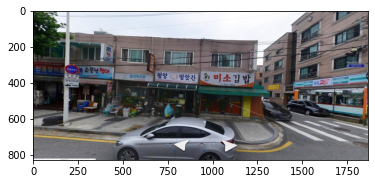

In [2]:
import matplotlib.pyplot as plt
import cv2
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/atomic-acrobat-333204-dd77f3a97d22.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/Exploration18/1.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

img_path = os.getenv('HOME')+'/aiffel/Exploration18/1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Texts:

"국영수
522-0799
초등부| 중등부고등부
내선
T522 0709
HR
T 522
0709
HAPP DOG
나경공인중개시원
PARIS BAGUETTE
528-4222
"

"국영수"

"522-0799"

"초등부"

"|"

"중등부"

"고등부"

"내선"

"T522"

"0709"

"HR"

"T"

"522"

"0709"

"HAPP"

"DOG"

"나경"

"공인"

"중개"

"시원"

"PARIS"

"BAGUETTE"

"528-4222"
bounds: (952,415),(993,416),(993,424),(952,423)


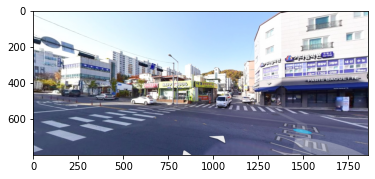

In [37]:
path = os.getenv('HOME')+'/aiffel/Exploration18/2.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

img_path = os.getenv('HOME')+'/aiffel/Exploration18/2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
import keras_ocr
import numpy as np

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [38]:
images = []
for i in range(1,21) :
    images.append(cv2.imread(os.getenv('HOME')+'/aiffel/Exploration18/'+str(i)+'.jpg'))
    
prediction_groups = []
for i in range(0,20) :
    print(i)
    imgnp = np.array(images[i])
    prediction_groups.append(pipeline.recognize([imgnp]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


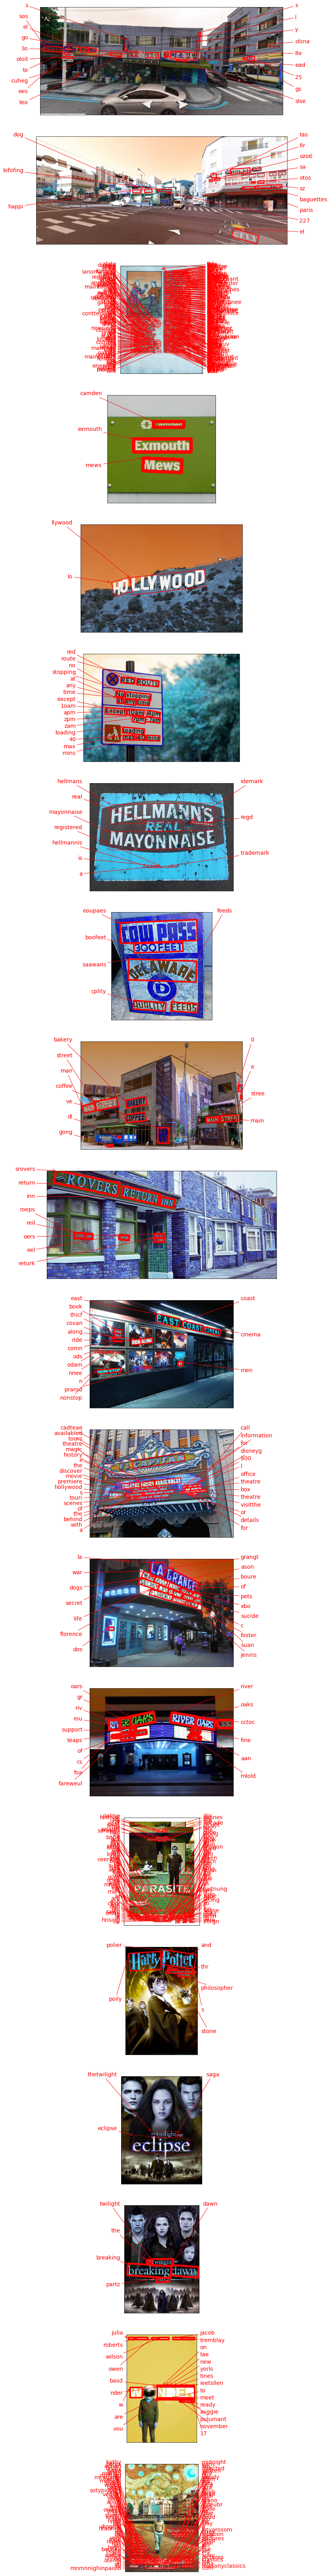

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 120))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [28]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = path = os.getenv('HOME')+'/aiffel/Exploration18'
img_file_path = work_dir + '/6.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/Exploration18/0000.png
/aiffel/aiffel/Exploration18/0001.png
/aiffel/aiffel/Exploration18/0002.png
/aiffel/aiffel/Exploration18/0003.png
/aiffel/aiffel/Exploration18/0004.png
/aiffel/aiffel/Exploration18/0005.png
/aiffel/aiffel/Exploration18/0006.png
/aiffel/aiffel/Exploration18/0007.png
/aiffel/aiffel/Exploration18/0008.png
/aiffel/aiffel/Exploration18/0009.png
/aiffel/aiffel/Exploration18/0010.png
/aiffel/aiffel/Exploration18/0011.png
/aiffel/aiffel/Exploration18/0012.png
/aiffel/aiffel/Exploration18/0013.png
/aiffel/aiffel/Exploration18/0014.png
/aiffel/aiffel/Exploration18/0015.png
/aiffel/aiffel/Exploration18/0016.png
/aiffel/aiffel/Exploration18/0017.png
/aiffel/aiffel/Exploration18/0018.png



No

Stopping

at

any

time

Except

10am

; ‘ eS :

-4pm

7pm

—

Tam

C

loading

5.

max

40

mins

Done


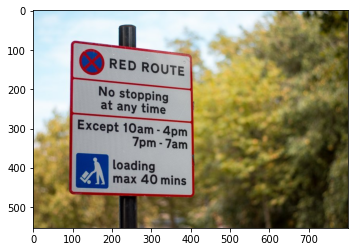

In [29]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

img_path = os.getenv('HOME')+'/aiffel/Exploration18/6.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

/aiffel/aiffel/Exploration18/0000.png
/aiffel/aiffel/Exploration18/0001.png
/aiffel/aiffel/Exploration18/0002.png
~ €3Scamden ~

Da

Views

Done


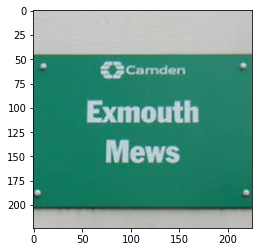

In [33]:
work_dir = path = os.getenv('HOME')+'/aiffel/Exploration18'
img_file_path = work_dir + '/4.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

recognize_images(cropped_image_path_list)
img_path = os.getenv('HOME')+'/aiffel/Exploration18/4.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [35]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = path = os.getenv('HOME')+'/aiffel/Exploration18'
img_file_path = work_dir + '/2.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/Exploration18/0000.png


 . 다

Done


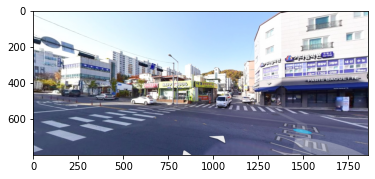

In [36]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

img_path = os.getenv('HOME')+'/aiffel/Exploration18/2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

저는 OCR을 이용해서 가게의 간판의 글자를 인식해서 인스타 맛집을 검색해주는 서비스를 기획해봤습니다.  
프로세스는 간판의 글자인식 => 인스타 검색 => 검색결과와 평가 즉석으로 띄워주기 이런식으로 제작하면 어떨까 합니다  
기획한 것을 바탕으로 3가지 모델의 테스트 결과를 분석해보았을때  
테서렉트는 성능이 약간 떨어지고 한글에 대한 OCR수행결과도 만족스럽지 못한 모습입니다.   
케라스 모델의 경우에는 성능은 좋지만 한글에 대한 학습이 되어있지 않아서 부적절합니다.  
때문에 한글 인식률이 독보적으로 좋은 구글 OCR API를 채택했습니다.  
구글 API의 경우에는 다양한 각도에서 찍더라도 인식률이 좋기때문에 기획과 더욱 어울린다고 생각합니다.